## 데이터 프레임 다루기

### 데이터 프레임 Concat

In [12]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 11.6/11.6 MB 56.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fpath = "./datasets"

In [4]:
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

print(df1, '\n')
print(df2, '\n')

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5 



In [6]:
## DataFrame
exam_data = {
    "수학":[90,80,70],
    "영어":[90,70,80],
    "성별":["남","남","여"],
    "합격":[True,False,True]
}

exam_df = pd.DataFrame(exam_data)
print(exam_df)

   수학  영어 성별     합격
0  90  90  남   True
1  80  70  남  False
2  70  80  여   True


In [7]:
## Attribute
exam_df.shape
exam_df.columns
exam_df.dtypes

수학     int64
영어     int64
성별    object
합격      bool
dtype: object

In [8]:
## Summary statistic
print(exam_df["수학"].mean())
print(exam_df["수학"].median())
print(exam_df["수학"].std())
print(exam_df["수학"].var())
print(exam_df["수학"].sem())
print(exam_df["수학"].min())
print(exam_df["수학"].max())

80.0
80.0
10.0
100.0
5.773502691896258
70
90


In [14]:
## sns
print(sns.get_dataset_names())
tips = sns.load_dataset("tips")
print(tips.head())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


correlation = 
             total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


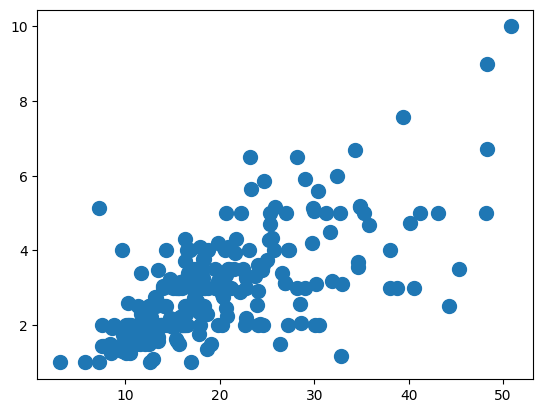

In [15]:
# 상관계수 계산
print("correlation = \n", tips[["total_bill", "tip"]].corr())
plt.scatter(tips["total_bill"], tips["tip"], s = 100)
plt.show()

In [17]:
# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기, Outer join by column name
result1 = pd.concat([df1, df2])
print("pd.concat([df1, df2])")
print(result1, '\n')

# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기
result2 = pd.concat([df1, df2], join = "inner")
print("pd.concat([df1, df2], join = 'inner')")
print(result2, '\n')


# 2개의 데이터프레임을 좌우 열 방향으로 이어 붙이듯 연결하기, Outer join by index 
result3 = pd.concat([df1, df2], axis=1)
print("pd.concat([df1, df2], axis=1)")
print(result3, '\n')

# join='inner' 옵션 적용하기(교집합)
result4 = pd.concat([df1, df2], axis=1, join='inner')
print("pd.concat([df1, df2], axis=1, join='inner')")
print(result4, '\n')


NameError: name 'df1' is not defined

### 데이터 프레임 Merge

In [20]:
fname1 = "stock price.xlsx"
fname2 = "stock valuation.xlsx"
file1 = os.path.join(fpath, fname1)
file2 = os.path.join(fpath, fname2)

print(fpath)

./datasets


In [24]:
# 주식 데이터를 가져와서 데이터프레임 만들기
#df1 = pd.read_excel(file1, index_col='id')
df1 = pd.read_excel('C:\Users\user\Desktop\머신러닝\dataset\stock price.xlsx')
#df2 = pd.read_excel(file2, index_col='id')
df2 = pd.read_excel('C:\Users\user\Desktop\머신러닝\dataset\stock valuation.xlsx')

print("df1 = \n")
print(df1,"\n")
print('df2 = \n')
print(df2)
print('\n')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2474567623.py, line 3)

In [12]:
# 데이터프레임 결합(join)
df3 = df1.join(df2)
print('df3 \n', df3)
print('\n')

# 데이터프레임 결합(join) - 교집합
df4 = df1.join(df2, how='inner') # index matching
print('df4 \n', df4)
print(df4)

df3 
        stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN    

In [ ]:
# 데이터프레임 합치기 - 교집합
merge_inner = pd.merge(df1, df2, how='inner', on='id') # how: str = 'inner'
print('pd.merge(df1, df2) : \n', merge_inner)
print('\n')

# 데이터프레임 합치기 - 합집합
merge_outer = pd.merge(df1, df2, how='outer', on='id')
print('outer \n', merge_outer)
print('\n')

# 데이터프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
print('left \n',merge_left)
print('\n')

# 데이터프레임 합치기 - 오른쪽 데이터프레임 기준, 키 값 분리
merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')
print('right \n',merge_right)
print('\n')


### 데이터 프레임 Group_by()

In [13]:

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

print('dtypes : \n', df.dtypes)

print('승객 수:', len(df))
print(df.head())
print('\n')


dtypes : 
 age          float64
sex           object
class       category
fare         float64
survived       int64
dtype: object
승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0




In [17]:
# class 열을 기준으로 분할
grouped = df.groupby(['class'])
print(list(grouped))
# print('grouped : \n', next(iter(grouped)))
# <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000283E9E50880>
print('\n')

# 연산 메소드 적용
average = grouped["fare"].mean()
print(average)
print('\n')

# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환
std_fare = grouped.fare.std()
print(std_fare)
print('\n')
print(type(std_fare))
print('\n')


(('Second',),       age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000         1
880  25.0  female  Second  26.0000         1
883  28.0    male  Second  10.5000         0
886  27.0    male  Second  13.0000         0

[184 rows x 5 columns])


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


<class 'pandas.core.series.Series'>




C:\Users\user\AppData\Local\Temp\ipykernel_18680\3058907134.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['class'])


In [40]:
# class 열, sex 열을 기준으로 분할
grouped_two = df.groupby(['class', 'sex'])

# grouped_two 그룹 객체에 연산 메소드 적용
average_two = grouped_two.mean()
print('grouped.mean : \n', average_two)
# print('grouped.mean : \n', average_two.unstack())

df.groupby(["sex"])["survived"].value_counts()

grouped.mean : 
                      age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447


C:\Users\user\AppData\Local\Temp\ipykernel_21256\679554857.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_two = df.groupby(['class', 'sex'])


sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

### 데이터 프레임 Aggregation

In [13]:
# 여러 함수를 각 열에 동일하게 적용하여 집계
print(titanic[["age", "fare"]].agg(func= ["min", "max", "mean"], axis = 0))

agg_all = grouped.agg(['min', 'max'])
print(agg_all.head())
print('\n')

NameError: name 'titanic' is not defined